In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt 
from scipy.stats import lognorm

### Experimental data

The experimental data is taken from: https://pubs.acs.org/doi/full/10.1021/jacs.8b09107
for the model free fits ("fabien_xxx" variables)


In [2]:
iles = [3, 13, 23, 30, 36, 44, 61]

sub_iles = [13, 36, 44]

fabien_tau_mf1 = np.array(
    [[8.97627128808e-11,    2.1118605248e-11,    2.26299994732e-11],
    [  2.48266403612e-10,    2.62549124232e-11,    2.41697085651e-11],
    [  1.59099493248e-10,    1.05726359399e-11,    9.65233104066e-12],
    [  2.32811869782e-10,    4.38487340082e-11,    3.66156734476e-11],
    [  3.05366501886e-10,    2.57725810386e-11,    2.32899511099e-11],
    [  2.89032206429e-10,    2.45020210079e-11,    2.01252063372e-11],
    [  1.52843922616e-10,    1.49408522066e-11,    1.43008810858e-11],
]) * 1e9 # [in ns]


# experimental data (mean, within percentile 16/84, dist is not gaussian)

# in ns 
fabien_tau_slows = np.array([[17.7 , 10.6, 8.9],
       [ 3.13, 1.1, 4.1],
       [18.3 ,  8.4, 11.4],
       [ 6.98,  4.2, 14.8],                   
       [ 2.48, 0.63, 0.45],
       [ 1.27,  0.22,  0.36],
       [17.3 ,  12.7, 9.1]])

# in ns 
fabien_tau_fasts = np.array([[ 34.8,  17,  24.4],
       [ 77.3,  39.3, 40.7 ],
       [150. , 12.1, 11.8],
       [ 61.8,  35.4, 47.6],
       [ 82.8,  37.6, 24.8],
       [ 70.3,  42.9, 42.1],
       [138. , 26.1, 18.2]]) / 1000

# Load the data corresponding to the ROMANCE fits

In [3]:
romance = np.load(os.getcwd()+'/data/1ubq_romance_S2_tc.npy', allow_pickle=True).item()
romance.keys()

dict_keys(['test_001', 'test_002', 'test_015', 'test_003', 'test_010', 'test_014', 'test_011', 'test_charm'])

In [4]:
marker_chi2 =  'd' # r'$\updownarrow{}$'   #"*"


marker_chi1 =  mpl.markers.MarkerStyle(marker=marker_chi2)  #r'$\leftrightarrow{}$'  #"D"
marker_chi1._transform = marker_chi1.get_transform().rotate_deg(90)

MARKERSIZE = 72


# Plot

In [44]:
def subplot_mf(tau_slows, tau_fasts, tau_mf1, ax, plot_all):
    
    size = 8
    
    ax.errorbar(tau_mf1.T[0], y = 1, xerr= np.array([tau_mf1.T[1:3]]).T, ls ='', marker='s', 
            color = '#2cb218', label = r'Cousin et al. $\tau$ (MF1)', zorder = 2, ms = size, 
                elinewidth = 4)
    
    if not plot_all:
        return 
    
    ax.errorbar(tau_slows.T[0], y = 1 ,xerr= np.array([tau_slows.T[1:3]]).T, ls ='', 
            marker='s', color = 'black', label = r'Cousin et al. $\tau_s$ (MF2)', zorder = 1, ms = size, 
            elinewidth = 4)


    ax.errorbar(tau_fasts.T[0], y = 1, xerr= np.array([tau_fasts.T[1:3]]).T, ls ='', 
                marker='s', color = 'darkgrey', label = r'Cousin et al. $\tau_f$ (MF2)', zorder = 1, 
                ms = size, elinewidth = 4)
    

def subplot_MSM(ax, mfpts_charmm, mfpts_amber, alpha=1, markers_charmm = 's', markers_amb = 's', just_charmm = False):
    
    size = 72
    offset = 0.5
    

    for mfpt, marker in zip(mfpts_charmm, markers_charmm):        
        ax.scatter(mfpt, [-2+offset], marker = marker,
                   color = '#60046E', alpha = alpha, zorder =2, s = size)
    
    
    for mfpt, marker in zip(mfpts_amber, markers_amb):
        ax.scatter(mfpt, [-2-offset], marker = marker,
                   color = '#05668D', alpha = alpha, zorder =2, s = size)

            
            
def subplot_MSM_its(ax, mfpts_charmm, mfpts_amber, alpha=1):
    
    size = 72
    offset = 0.5
    
    for mfpt in mfpts_charmm:
        
        if mfpt <= 0.1:
            facecolor = 'none'
        else:
            facecolor = '#60046E'
        
        ax.scatter(mfpt, [-5+offset], marker = 'o', facecolor = facecolor,
                   color = '#60046E', alpha = alpha, zorder =2, s = size)
    
    for mfpt in mfpts_amber:
        
        if mfpt <= 0.2:
            facecolor = 'none'
        else:
            facecolor = '#05668D'
        
        ax.scatter(mfpt, [-5-offset], marker = 'o', facecolor = facecolor,
                   color = '#05668D', alpha = alpha, zorder =2, s = size)      
            

In [45]:
def plot_romance_chi1(axd, romance, marker = marker_chi1, ff = 'amber'):
    
    for subax, ile in zip(['A', 'B', 'C'], [13, 36, 44]):
        if ff == 'amber':
            
            if ile == 44:
                pass
                continue
            
            tc2 = romance['test_001'][ile][1]['tc']
            tc_err2 = romance['test_001'][ile][1]['tc_err']
            #print (f'chi2 = {tc2:.4f} +- {tc_err2:.4f}'
            axd[subax].scatter(tc2, -8.5, marker = marker,  s = 72, color = '#05668D', label = r'$\chi_1$ motion (Anmr)')
        else:
                    
            tc2 = romance['test_charm'][ile][1]['tc']
            tc_err2 = romance['test_charm'][ile][1]['tc_err']
        
        
            if ile == 44:
                pass
                continue
        
            axd[subax].scatter(tc2, -7.5, marker = marker,  s = 72, color = '#60046E', alpha = 1.0, label = r'$\chi_1$ motion (C36m)')
               
def plot_romance_chi2(axd, romance, marker = marker_chi2, ff = 'amber'):
    for subax, ile in zip(['A', 'B', 'C'], [13, 36, 44]):
        if ff == 'amber':
            tc1 = romance['test_001'][ile][2]['tc']
            tc1_err = romance['test_001'][ile][2]['tc_err']
            #print (f'chi1 = {tc1:.4f} +- {tc1_err:.4f}')

            axd[subax].scatter(tc1, -8.5, marker = marker,  s = 72, color = '#05668D', label = r'$\chi_2$ motion (Anmr)')

        else:
            tc1 = romance['test_charm'][ile][2]['tc']
            tc1_err = romance['test_charm'][ile][2]['tc_err']
            #print (f'chi1 (charmm) = {tc1:.4f} +- {tc1_err:.4f}')

            axd[subax].scatter(tc1, -7.5, marker = marker,  s = 72, color = '#60046E', alpha = 1, label = r'$\chi_2$ motion (C36m)')

/tmp/ipykernel_3049497/2231023402.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  axd[k].set_xticklabels([ '0.001', '0.01', '0.1', '1', '10', '100'])


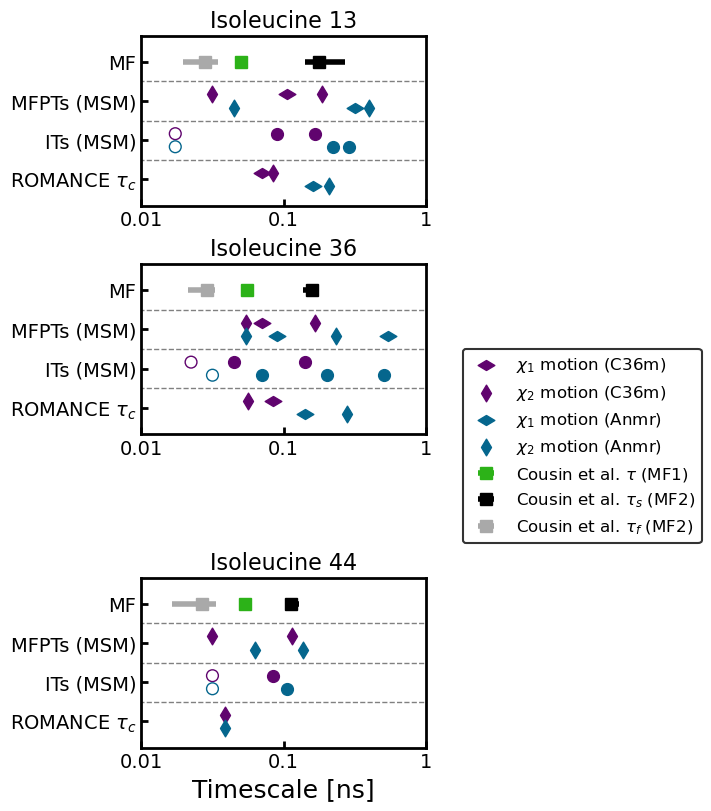

In [58]:
# New way to plot it:


fig = plt.figure(layout="constrained", figsize = (7, 8))

axd = fig.subplot_mosaic(
    """
    A
    B
    C
    """
)


idx_sub = [1, 4, 5]

for i, k in zip(idx_sub, axd.keys()):
    subplot_mf(fabien_tau_slows[i], fabien_tau_fasts[i], fabien_tau_mf1[i], axd[k], plot_all=True)
    
    
    
# Plot the data from other sources

plot_romance_chi2(axd, romance, ff = 'charmm')  
plot_romance_chi1(axd, romance, ff = 'charmm')

# to also plot amber
plot_romance_chi2(axd, romance, )
plot_romance_chi1(axd, romance, )


# Plot the MSM information (always give forward followed by backwards)

just_charmm = True

# Ile 13 is a chi2 motion (and a chi1 motion slower!!)
subplot_MSM(axd['A'], 
            mfpts_charmm = [0.1, 1.1, 3.5], 
            mfpts_amber  = [0.2, 10, 16], # corresponds to 5-9, 8-9 and 6-9
            markers_charmm= [marker_chi2, marker_chi1, marker_chi2], 
            markers_amb=[marker_chi2, marker_chi1, marker_chi2], 
            just_charmm=just_charmm)

# Ile 36 is a Chi2 motion + chi1 (slower) motion
subplot_MSM(axd['B'], 
            mfpts_charmm = [0.3, 0.5, 2.8], 
            mfpts_amber  = [0.3, 0.8, 5.5, 29], 
            markers_charmm= [marker_chi2, marker_chi1, marker_chi2],
            markers_amb=[marker_chi2, marker_chi1, marker_chi2, marker_chi1], 
            just_charmm=just_charmm )

# Ile 44 is a all chi2 motion !!
subplot_MSM(axd['C'], 
            mfpts_charmm  = [0.1, 1.3], # corresponds to 5-7 and 6-7
            mfpts_amber  = [0.4, 1.9], # corresponds to 3-5 and 4-5
            markers_charmm= [marker_chi2, marker_chi2], 
            markers_amb=[marker_chi2, marker_chi2], 
            just_charmm=just_charmm)


# Adding the Implied timescales to this! 

# Ile 13 is a chi2 motion (and a chi1 motion slower!!)
subplot_MSM_its(axd['A'], [0.03, 0.8, 2.8], # charmm
            [0.03, 5.0, 8.4], # same three motion as MFPTs
               )


# Ile 36 is a all chi2 motion !!
subplot_MSM_its(axd['B'], [0.05, 0.2, 2.0, ],
                [0.1, 0.5, 4.1, 25.6],)


# Ile 44 is a all chi2 motion !!
subplot_MSM_its(axd['C'], [0.1, 0.7], # charmm
                [0.1, 1.1],)


# Some basic stuff to format nicely    
for i, k in enumerate(axd.keys()):

    axd[k].set_xscale('log')
    axd[k].set_xlim([0.01, 100])

    axd[k].set_ylim([-10, 3])
    axd[k].set_yticks([-8, -5, -2, 1])

    axd[k].set_xticklabels([ '0.001', '0.01', '0.1', '1', '10', '100'])
    axd[k].set_title(f'Isoleucine {sub_iles[i]}', fontsize = 16)


    #axd[k].vlines(x=0.05, ymin=-10, ymax=10, ls ='--', color = 'black', lw = 0.5)
    #axd[k].vlines(x=5, ymin=-10, ymax=10, ls ='--', color = 'black', lw = 0.5)
    
    axd[k].hlines(y=-0.5, xmin=0, xmax=100, ls ='--', color = 'grey', lw = 1)
    axd[k].hlines(y=-3.5, xmin=0, xmax=100, ls ='--', color = 'grey', lw = 1)
    axd[k].hlines(y=-6.5, xmin=0, xmax=100, ls ='--', color = 'grey', lw = 1)
    
    axd[k].set_yticklabels([r'ROMANCE $\tau_c$', 'ITs (MSM)', 'MFPTs (MSM)', 'MF',])

    for axis in ['top','bottom','left','right']:
        axd[k].spines[axis].set_linewidth(2) 
    
    axd[k].tick_params(axis="both",direction="in", labelsize=14, which='major', width = 2, length = 5, )
    axd[k].tick_params(axis="both",direction="in", width = 2, labelsize=14,  which='minor', length = 3,)
   
    
    
# We can always add legend later on in powerpoint


order = [1,0,3,2,4, 5, 6]

handles, labels = axd['B'].get_legend_handles_labels()

legend = axd['B'].legend([handles[idx] for idx in order],[labels[idx] for idx in order], 
                        fontsize=12, edgecolor = 'black', bbox_to_anchor=(1.1, 0.55), facecolor = 'white')


frame = legend.get_frame()
frame.set_linewidth(1.5)


axd['C'].set_xlabel('Timescale [ns]', fontsize = 18)



None

In [53]:
# fig.savefig('comparison_3ile_motion_charmm.pdf', facecolor='white', dpi=300)
fig.savefig('./comparison_3ile_motion_both.png', facecolor='white', dpi=300)

In [56]:
os.getcwd()

'/fileserver/pine/pine2/cchampion/NMR/MD_and_NMR_Relaxometry/analysis/msm'